### Redefine Walk Function

In [58]:
import os
import numpy as np
from load_image_data import load_batch
from load_image_data import divide_paths

WINDOWS = ["brain_bone_window", "brain_window", "max_contrast_window", "subdural_window"]
HEM_TYPES = ["epidural", "intraparenchymal", "intraventricular", "multi", "normal", "subarachnoid", "subdural"]

def walk_paths():
    train_paths = {'batch_1': {}, 
                   'batch_2': {},
                   'batch_3': {}}
    validate_paths = {}
    test_paths = {}

    for type in HEM_TYPES:
        root, dirs, files = next(os.walk("data/epidural/brain_bone_window"))
        full_train, test, val = divide_paths(files)

        validate_paths[type] = val
        test_paths[type] = test

        b1, b2, b3 = divide_paths(full_train, 0.33, 0.33)
        train_paths["batch_1"][type] = b1
        train_paths["batch_2"][type] = b2
        train_paths["batch_3"][type] = b3

    return train_paths, validate_paths, test_paths

print(walk_paths())


train, val, test = walk_paths()

print(train)
print(val)
print(test)

test_data = load_batch(test)

print(test_data)

({'batch_1': {'epidural': ['ID_3a4766818.jpg', 'ID_0b6508ef5.jpg', 'ID_db6c35ad4.jpg', 'ID_ecce951e2.jpg', 'ID_1f0ae213d.jpg', 'ID_041ab9da8.jpg', 'ID_042f4f597.jpg', 'ID_9d15aba93.jpg', 'ID_b59040a09.jpg', 'ID_cbf231997.jpg', 'ID_5e36dc951.jpg', 'ID_e0942808d.jpg', 'ID_253665d10.jpg', 'ID_2cc6725d4.jpg', 'ID_053172482.jpg', 'ID_d6c7f13c9.jpg', 'ID_00a05276d.jpg', 'ID_c8bc515cb.jpg', 'ID_905e6b2d1.jpg', 'ID_bb8f02a19.jpg', 'ID_1a2b0d300.jpg', 'ID_2acb65de4.jpg', 'ID_a4e2930de.jpg', 'ID_a94df8d30.jpg', 'ID_5058a13b1.jpg', 'ID_aa6b7bf5d.jpg', 'ID_b7d7eac6d.jpg', 'ID_be6ed3868.jpg', 'ID_589c34427.jpg', 'ID_c8fcc1e3e.jpg', 'ID_5338ecdc3.jpg', 'ID_91e103c16.jpg', 'ID_f4d204594.jpg', 'ID_834add912.jpg', 'ID_004966e2d.jpg', 'ID_2396ffa79.jpg', 'ID_be955dc8a.jpg', 'ID_f72d82983.jpg', 'ID_073dd4756.jpg', 'ID_d7644345d.jpg', 'ID_2073d4d3a.jpg', 'ID_be4959268.jpg', 'ID_297f85c17.jpg', 'ID_bf000ca18.jpg', 'ID_be15d2759.jpg', 'ID_ac981a516.jpg', 'ID_10b7b874a.jpg', 'ID_ff473454b.jpg', 'ID_f4c3db99c

#### ^ idk

### 1. Get Train \& Test Data

In [59]:
import os 
from PIL import Image, ImageOps
import numpy as np


path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('data/epidural/brain_bone_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('data/intraparenchymal/brain_bone_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('data/intraventricular/brain_bone_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('data/multi/brain_bone_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('data/normal/brain_bone_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('data/subarachnoid/brain_bone_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  10700
Number of type 5:  16423


In [60]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5]])

OneHotEncoder()

In [61]:
import random


data = []
result = []

for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[4]]).toarray())
        
for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(encoder.transform([[5]]).toarray())

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)] # FIXME: trying to reduce data so calling fit() doesn't take forever

In [62]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(10209, 1, 6)

In [63]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(40833, 1, 6)

In [64]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (40833, 128, 128)
test data:  (10209, 128, 128)
train data after reshape:  (40833, 16384)
test data after reshape:  (10209, 16384)


### 2. Train data w/ fit()


In [65]:
from sklearn.linear_model import LogisticRegression


X_train = train_data.reshape(train_data.shape[0], -1) 
y_train = np.argmax(train_result, axis=2)


logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, multi_class='multinomial')

### 3. Test data w/ score()

In [67]:
X_test = test_data.reshape(test_data.shape[0], -1) 
y_test = np.argmax(train_result, axis=2)

score = logreg.score(X_test, y_test)
print("Logistic Regression Score:", score)

ValueError: Found input variables with inconsistent numbers of samples: [40833, 10209]

### 4. Generate Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

y_predict = logreg.predict(test_data.reshape(-1,128*128))


conf_mx = confusion_matrix(np.argmax(test_result, axis=2), y_predict)
conf_mx

array([[  34,   28,    8,   38,   29,   27],
       [  34,  444,  147,  360,  391,  160],
       [  13,  151,  249,  238,  208,  111],
       [  33,  333,  215,  715, 1731,  189],
       [  24,  326,  198, 1757,  764,  170],
       [  31,  176,  106,  202,  215,  354]])

### 5. Mark Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

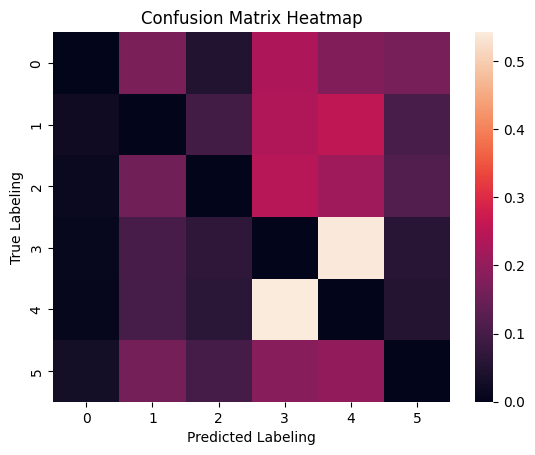

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

sns.heatmap(nconf_mx)

plt.xlabel("Predicted Labeling")
plt.ylabel("True Labeling")
plt.title("Confusion Matrix Heatmap")

another model attempt...

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 options
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# model.save('image_classifier_model_no_validation.h5')


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 16384), dtype=float32). Expected shape (None, 128, 128, 3), but input has incompatible shape (None, 16384)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 16384), dtype=uint8)
  • training=True
  • mask=None